## Loading Libraries
First we need to load the required Python libraries. Libraries are like extensions to the base python that add functionality or help to carry out specific tasks. 

We will load some libraries that will boost your data handling capacity. The main ones are numpy and pandas - we will call them `np` and `pd`.

In [16]:
import numpy as np
import pandas as pd

## Loading the heart attack data set

Use `pd.read_csv` to read in the file (add header=None).

Use `pd.shape` to check dimensions and `pd.head()` to take a look at it.

In [2]:
heart = pd.read_csv("./processed.cleveland.data.clean", header=None)

In [3]:
heart.shape

(297, 14)

In [4]:
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Loading the heart attack data set

What are we looking at?

The last column is different kinds of heart attacks (0 is none, 1,2,3,4 are different grades).

Add column names to make your life easier.

In [5]:
heart.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Our goal: predict heart disease from the data

For now, we will treat the last column 'num' as a binary outcome. 0 is no heart disease, anything higher than zero is heart disease. We can do multivariate classification later!


In [7]:
# option 1
X = heart.iloc[:,0:13]
y = heart.iloc[:,-1]

# option 2
X = heart.drop('num', axis = 1)
y = heart['num']

# make everyone with any type of heart disease a 1
y[y > 0] = 1

C:\Users\sarah.barrington\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [9]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

Take out the last row and call it `num` and keep all the other rows in a separate data.frame called `attributes`.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


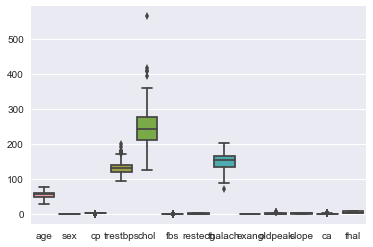

In [18]:
sns.boxplot(X)

## Principal components analysis can reveal clustering

Use scikit-learn `StandardScaler()` to scale all of the features and use `seaborn` to produce a pairplot and a heatmap of the correlctions.

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X))
X_scaled.columns = X.columns
X = X_scaled

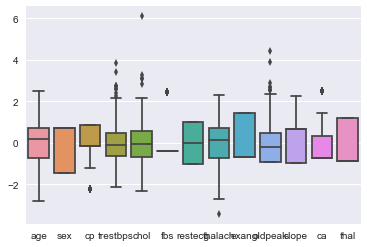

In [20]:
sns.boxplot(X)

Pairplot:

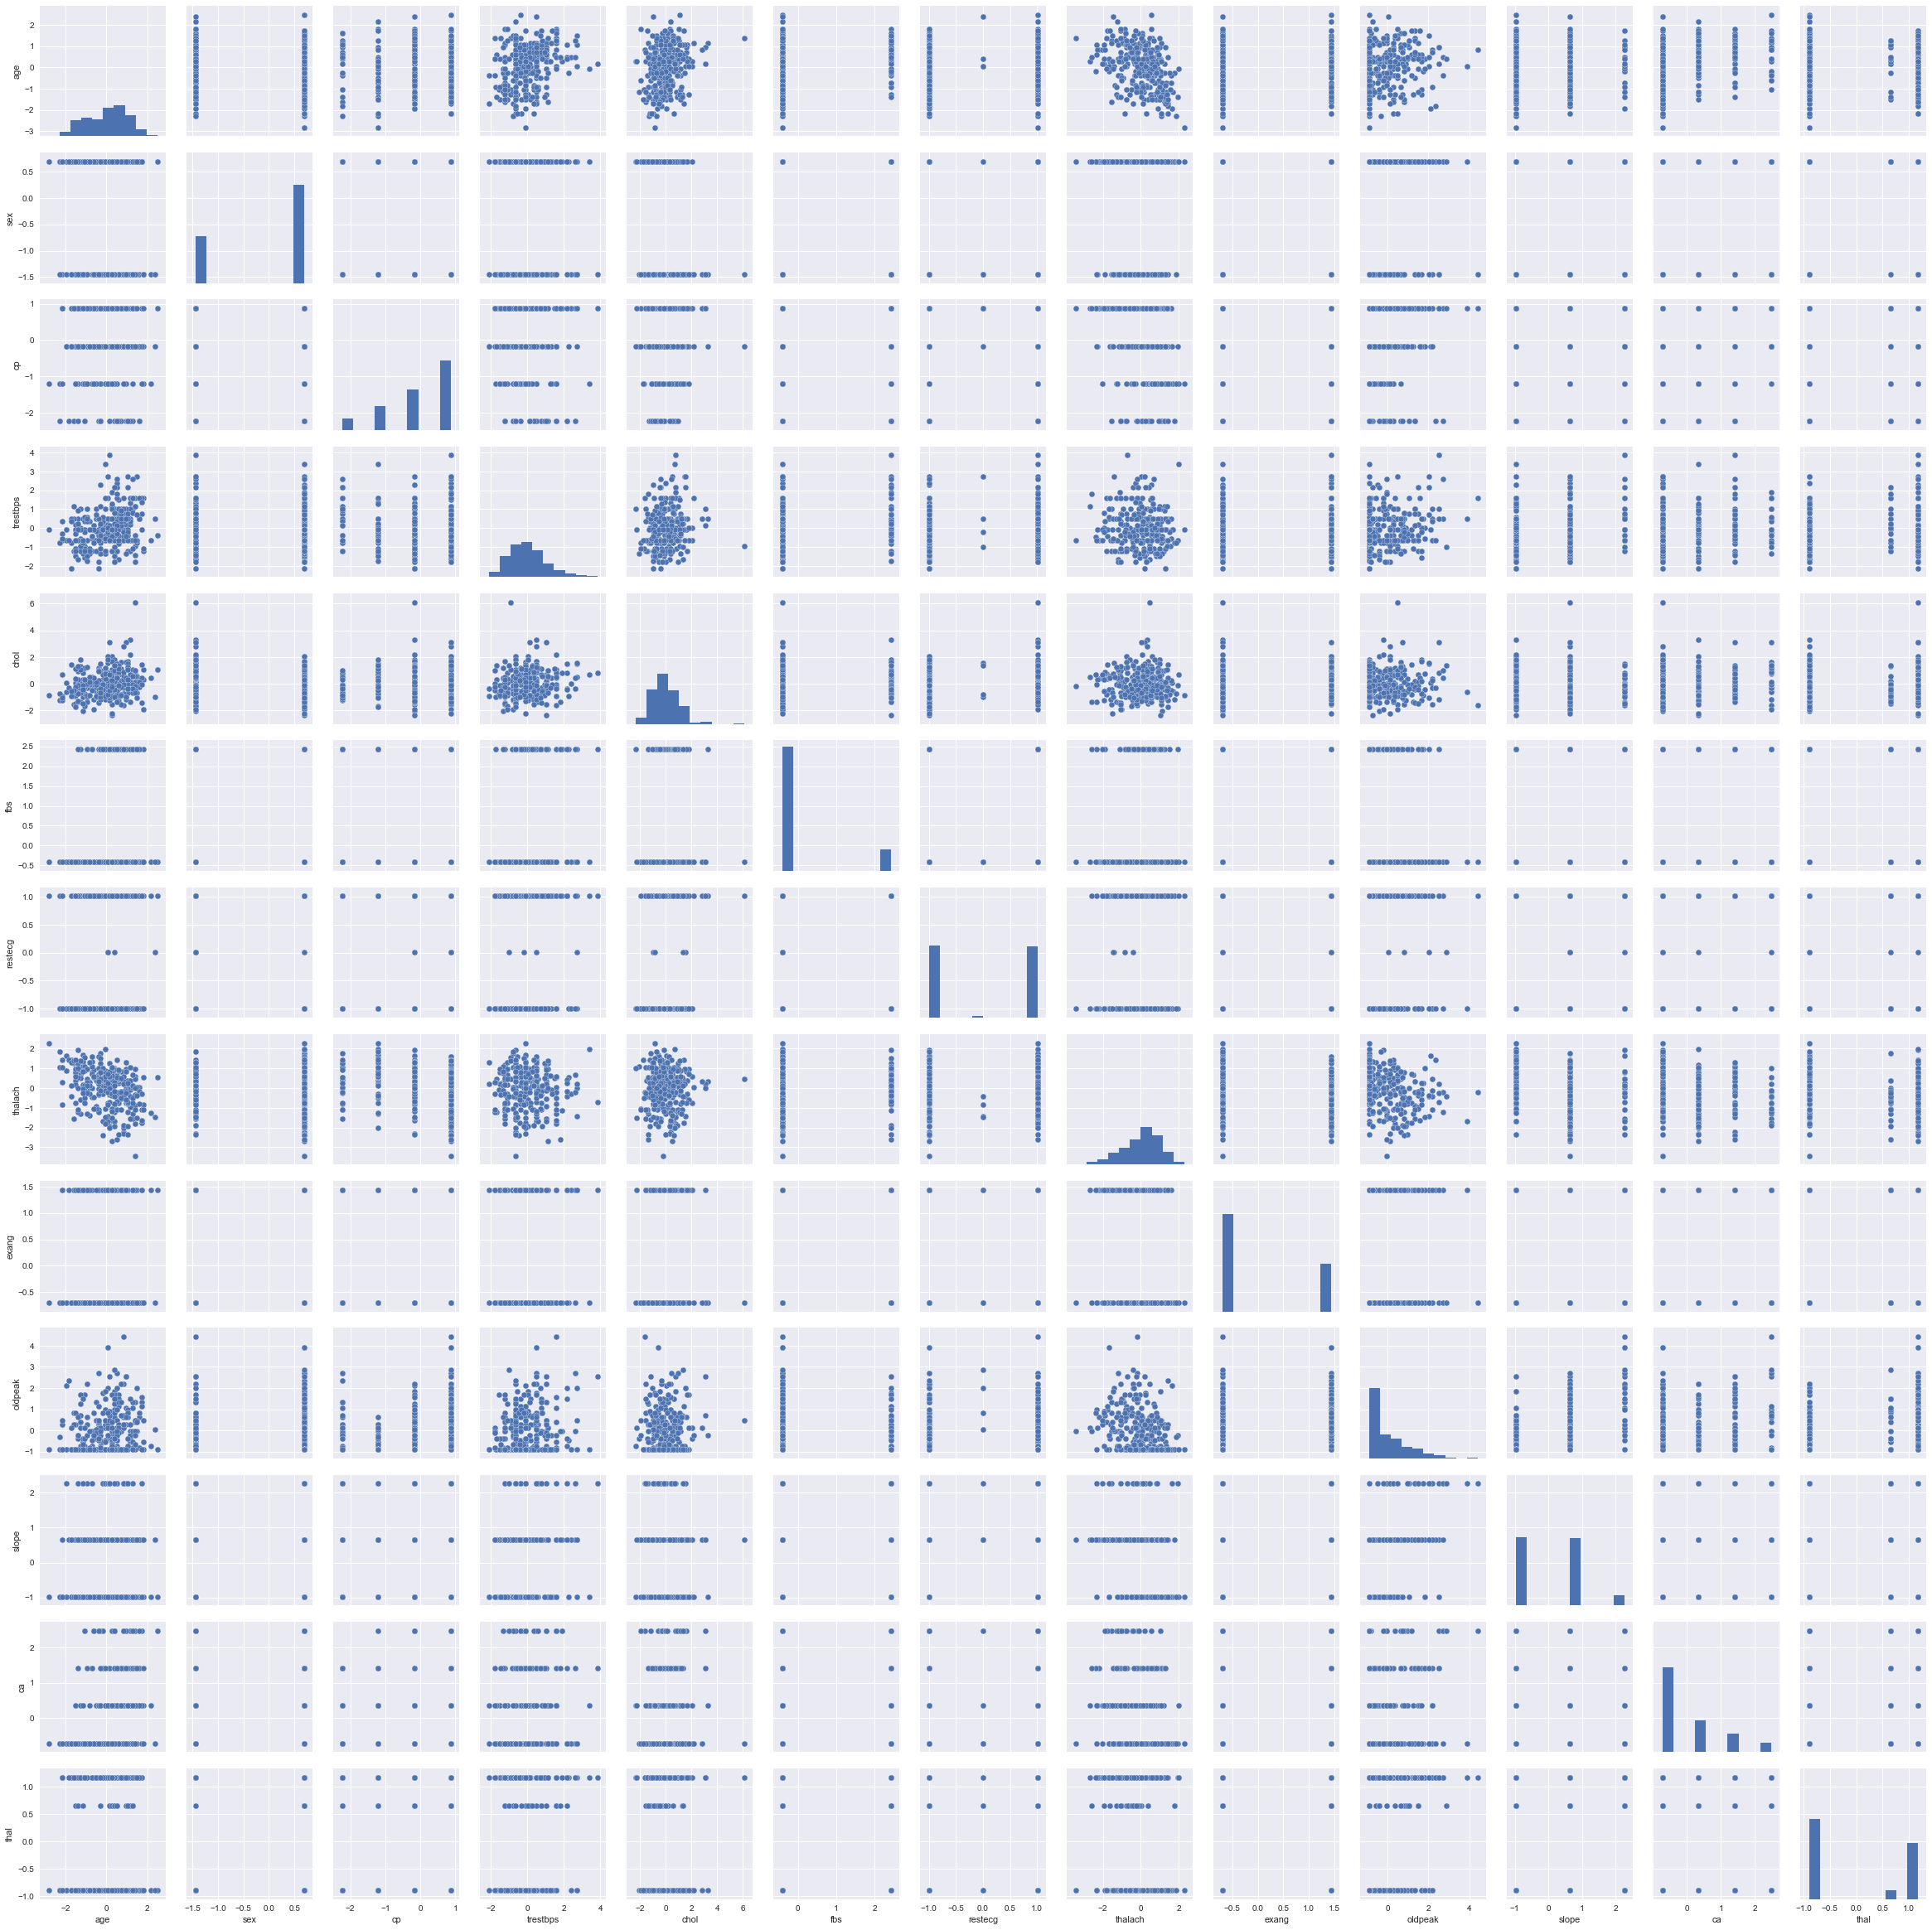

In [21]:
sns.pairplot(X)


Heatmap:

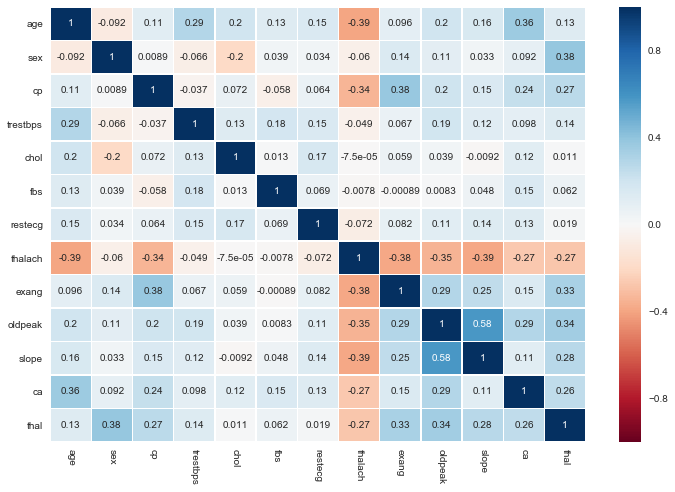

In [23]:
corrmat = X.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrmat, 
            linewidths=0.5, 
            cmap="RdBu", 
            vmin=-1, 
            vmax=1, 
            annot=True)

plt.xticks(rotation=270);

Use scikit-learn `PCA` to calculate the PCs and display the variance explained.

([<matplotlib.axis.XTick at 0x248e5b00>,
 <a list of 13 Text xticklabel objects>)

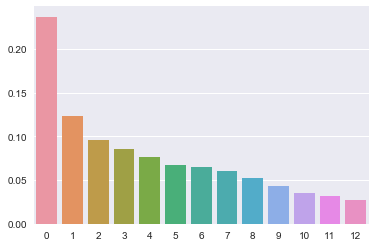

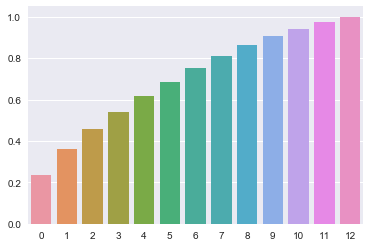

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA()
pca.fit(X)

sns.barplot(x=np.arange(0,pca.n_components_)+1, y=pca.explained_variance_ratio_)
plt.xticks(np.arange(0, pca.n_components_), np.arange(0, pca.n_components_))

plt.figure()
sns.barplot(np.arange(pca.n_components_)+1, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, pca.n_components_), np.arange(0, pca.n_components_))



Check out the `components` of the PCA object - what do they mean?

In [25]:
components = pd.DataFrame(pca.components_, 
                        columns = X.columns,
                        index   = X.columns)

## Bonus: display the components as a heatmap

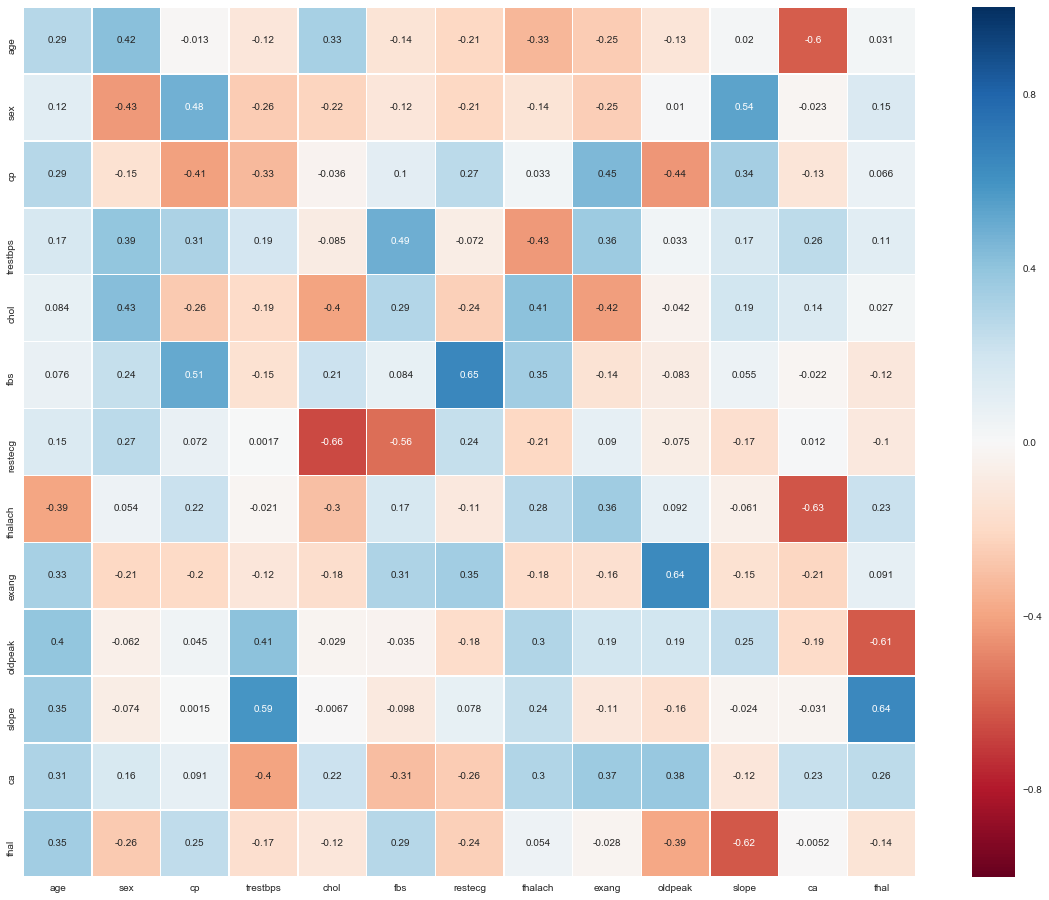

In [26]:
plt.figure(figsize=(20, 16))
sns.heatmap(
        components.transpose(), 
        linewidths=0.5, 
        cmap="RdBu", 
        vmin=-1, vmax=1, annot=True )

Plot the first two principal components and overlay the disease state as the color to see if they cluster:

In [27]:
X_pca = pd.DataFrame(pca.transform(X))
X_pca.columns = ['PC' + str(i+1) for i in range(0,13)]
X_pca = X_pca.join(y)
X_pca.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,num
0,1.130664,1.087655,3.164263,2.293052,-0.023175,-0.578814,0.664854,0.536787,-1.495392,-0.499485,-0.337585,-0.479583,0.140637,0
1,3.190926,1.417885,-0.533715,-0.857970,0.006289,-0.745347,-0.259063,-1.069777,0.342524,1.431509,1.145257,0.891418,1.022265,1
2,3.124339,-0.657008,-0.285134,-0.626641,-0.152793,-1.130179,-0.324995,-0.209299,0.043205,0.462304,-0.431665,-0.863228,-0.202336,1
3,-0.484339,-1.410972,0.397806,2.832741,-0.721309,0.388361,-0.522221,2.153525,0.760079,0.228379,1.545065,-0.342960,0.588380,0
4,-2.284542,0.330033,-0.072260,1.209318,-0.770835,-0.625587,0.379567,-0.014736,1.050381,0.628110,-0.797211,0.322946,-1.150352,0


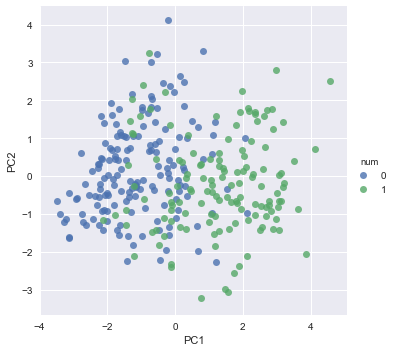

In [28]:
sns.lmplot(x='PC1', y='PC2', data=X_pca, fit_reg=False, hue = 'num')


### Exploring principal components in 3D
Visualising data in a third dimension allows further exploration of potential clustering. 

In [29]:
from visuals import *

In [30]:
plot_3d_scatter(X_pca, 'PC1', 'PC2', 'PC3')

# Bonus (if you are ahead):

Load the iris data set using  and do PCA.

In [61]:
from sklearn.datasets import load_iris

In [62]:
iris = load_iris()
target = pd.DataFrame(iris.target)
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
pca = PCA()
iris_pca = pd.DataFrame(pca.fit_transform(iris))
iris_pca.columns = ['PC' + str(i) for i in range(0,4)]
#iris_pca = iris_pca.join(target)

iris_pca['target'] = target
iris_pca.head()


,PC0,PC1,PC2,PC3,target
0,-2.684207,0.326607,-0.021512,0.001006,0
1,-2.715391,-0.169557,-0.203521,0.099602,0
2,-2.889820,-0.137346,0.024709,0.019305,0
3,-2.746437,-0.311124,0.037672,-0.075955,0
4,-2.728593,0.333925,0.096230,-0.063129,0


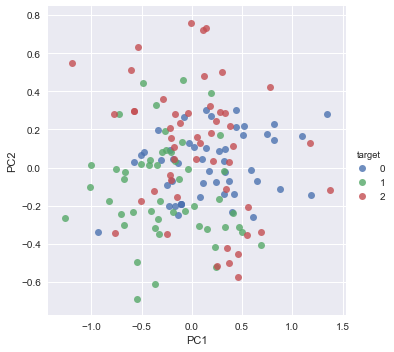

In [64]:
sns.lmplot(x='PC1', y='PC2', data=iris_pca, fit_reg=False, hue = "target")

# Simple classifier using Logistic Regression

A logistic regression models a binary outcome using a linear model, which is transformed into a 'sigma' shape.

This is a very commonly used model and a great place to start. 

First, use `train_test_split` to 'hide' some of our data to use for testing later on.

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("XTrain dimensions: ", X_train.shape)
print ("yTrain dimensions: ", y_train.shape)
print ("XTest dimensions: ", X_test.shape)
print ("yTest dimensions: ", y_test.shape)

XTrain dimensions:  (198, 13)
yTrain dimensions:  (198,)
XTest dimensions:  (99, 13)
yTest dimensions:  (99,)


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print (classification_report(y_test, y_pred))
#print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86        53
          1       0.84      0.83      0.84        46

avg / total       0.85      0.85      0.85        99



# Moving on to Random Forest

We will use a `RandomForestClassifier` to try to build a model to distinguish heart disease from healthy.

In [110]:
from sklearn.ensemble import RandomForestClassifier

Now, we can initialize the RandomForestClassifier and fit a model to our training data. Use `n_estimators=100` to use 100 different trees.

In [111]:
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=1000)

In [104]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Use `X_test` as an input to the classifer to get out `y_pred`. We can use the `classification_report` and `confusion_matrix` from scikit-learn to get an idea of how well we are performing.

In [105]:
y_pred = clf.predict(X_test)

In [106]:
print (classification_report(y_test, y_pred))
print ("Overall Accuracy: ", round(accuracy_score(y_test, y_pred), 2))

             precision    recall  f1-score   support

          0       0.74      0.96      0.84        53
          1       0.93      0.61      0.74        46

avg / total       0.83      0.80      0.79        99

Overall Accuracy:  0.8


In [107]:
mat = confusion_matrix(y_test, y_pred) 
print (mat)

[[51  2]
 [18 28]]


Not bad, but we only ran 100 trees... if we create more than 100 trees, do we get better accuracy? Where does it stop being worth making more trees?

Create a plot for different values from 100 to 1000 trees. This may take a while!!


/Users/ps14/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


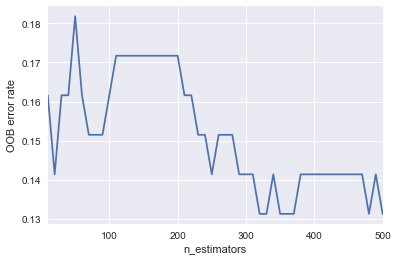

In [133]:
# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 500

error_rate = []

for i in range(min_estimators, max_estimators + 1, 10):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    error_rate.append( 1 - accuracy_score(y_test, y_pred))

# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.plot(range(min_estimators, max_estimators + 1, 10), error_rate)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


The `RandomForestClassifier` calculates a feature importance for each of the inputs. We can visualize these using seaborn barplot.

In [134]:
importance = clf.feature_importances_

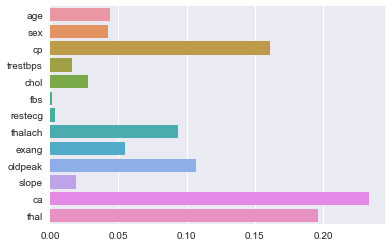

In [135]:
sns.barplot(x = importance, y = X.columns)

# (Bonus) Make a 'receiver operating characteristic' (ROC) curve and compare logistic regression and random forest

In [136]:
from sklearn.metrics import roc_curve

In [160]:
clf.set_params(n_estimators = 1000)
clf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

y_pred_rf = clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

y_pred_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds = roc_curve(y_test, y_pred_log_reg)


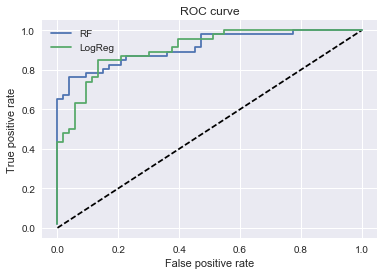

In [161]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_log_reg, tpr_log_reg, label='LogReg')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [162]:
thresholds

array([ 0.99533892,  0.88611251,  0.87875435,  0.8498042 ,  0.84338616,
        0.83211215,  0.80678077,  0.6795764 ,  0.65376742,  0.62381023,
        0.62167003,  0.6099128 ,  0.60094401,  0.45989993,  0.33196598,
        0.32177597,  0.2754664 ,  0.24155718,  0.20671039,  0.17790034,
        0.1680935 ,  0.1244043 ,  0.10627316,  0.1019906 ,  0.09109771,
        0.09100001,  0.01263734])

In [144]:
y_pred_log_reg[0:10]

array([ 0.01108254,  0.24609702,  0.01300718,  0.99441618,  0.04547804,
        0.53793413,  0.14037727,  0.69379279,  0.7468414 ,  0.13626654])

In [142]:
print(y_test[0:10])

167    0
211    1
63     0
154    1
5      0
77     0
183    0
158    0
9      1
139    0
Name: num, dtype: int64


# (Double Bonus) Multi-label classification

At the beginning of the notebook, we took all of the different grades of heart disease (1,2,3,4) and made them all 1 to represent any type of heart disease.

Use RandomForest to do multi-label classification - how does it do?

In [164]:
heart = pd.read_csv("./processed.cleveland.data.clean", header=None)
X = heart.iloc[:,0:13]
y = heart.iloc[:,-1]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [170]:
clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (classification_report(y_test, y_pred))
print ("Overall Accuracy: ", round(accuracy_score(y_test, y_pred), 2))

print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78        53
          1       0.00      0.00      0.00        22
          2       0.18      0.20      0.19        10
          3       0.00      0.00      0.00        11
          4       0.00      0.00      0.00         3

avg / total       0.36      0.56      0.44        99

Overall Accuracy:  0.56
[[53  0  0  0  0]
 [16  0  3  3  0]
 [ 7  1  2  0  0]
 [ 5  0  6  0  0]
 [ 2  0  0  1  0]]


/Users/ps14/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [169]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=0, n_estimators = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (classification_report(y_test, y_pred))
print ("Overall Accuracy: ", round(accuracy_score(y_test, y_pred), 2))

print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85        53
          1       0.40      0.27      0.32        22
          2       0.25      0.20      0.22        10
          3       0.27      0.36      0.31        11
          4       0.00      0.00      0.00         3

avg / total       0.59      0.59      0.58        99

Overall Accuracy:  0.59
[[46  4  0  2  1]
 [ 7  6  3  5  1]
 [ 1  2  2  3  2]
 [ 0  2  3  4  2]
 [ 1  1  0  1  0]]


# (TRIPLE BONUS!!) Make a tree

In [181]:
from sklearn.tree import export_graphviz

ImportError: cannot import name 'graphviz'

In [183]:
from sklearn.tree import DecisionTreeClassifier
import graphviz 

In [188]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
dot_data = export_graphviz(clf, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True)  

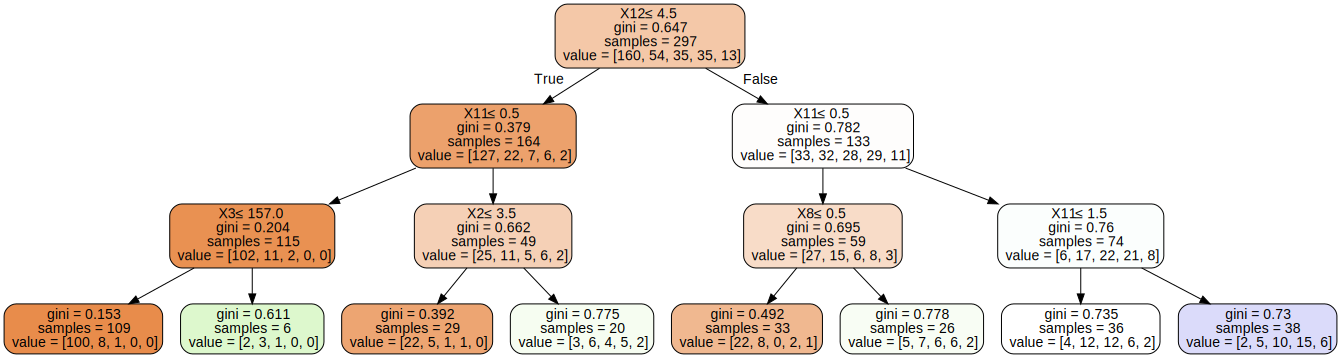

In [190]:
graph = graphviz.Source(dot_data)
graph

# Recap

There are _dozens_ of different supervised learning techniques, all with different strengths, weaknesses, and applications.

- We learned two, logistic regression and random forests.
- These models are relatively simple to understand, while still providing great performance. Random Forests provide the additional benefit of being able to model non-linear relationships.
- More important than the models themselves are the principles of training and testing, and model evaluation. These will not change nearly as much as the underlying models!
